In [1]:
import numpy as np
import pandas as pd
import pickle
from gensim.models import word2vec
import MeCab
import sys
from collections import Counter
import re
import urllib.request, urllib.error
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
tagger = MeCab.Tagger("-Owakati")
tagger.parse("")

'\n'

In [3]:
lunch_file = ["pretest_sushitsuu_lunch.csv",
              "pretest_sushiichi_lunch.csv",
              "pretest_sawada_lunch.csv",
              "pretest_mitani_lunch.csv",
              "pretest_matsukan_lunch.csv",
              "pretest_kiyoda_lunch.csv",
              "pretest_imamura_lunch.csv",
              "pretest_hatsune_lunch.csv"
              ]
dinner_file = ["pretest_sushitsuu_dinner.csv",
              "pretest_sushiichi_dinner.csv",
              "pretest_sawada_dinner.csv",
              "pretest_mitani_dinner.csv",
              "pretest_matsukan_dinner.csv",
              "pretest_kiyoda_dinner.csv",
              "pretest_imamura_dinner.csv",
              "pretest_hatsune_dinner.csv",
              "pretest_aozora_dinner.csv"
              ]
store_name = ["sushitsuu",
             "sushiichi",
             "sawada",
             "mitani",
             "matsukan",
             "kiyoda",
             "imamura",
             "hatsune",
             "aozora",
             ]

In [40]:
url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
slothlib_file = urllib.request.urlopen(url=url)
stop_words = [line.decode("utf-8").strip() for line in slothlib_file]
stop_words = [sw for sw in stop_words if not sw==u'']
my_stop_words = ["℃/", "℃", "kg", "訪問", "寿司", "すし", "なく", "美味しい", "美味", "～」", "○－", "○○/", ")○/","握り",
                 "シャリ","ネタ","ない","いい","良い","澤田","初音","きよ","最高","美味しかっ","素晴らしい","最後","最初","仕事",
                "好き","好み","非常"]

stop_words += my_stop_words 

In [30]:
def normalize_number(text):
    # 連続した数字を0で置換
    replaced_text = re.sub(r'\d+', '0', text)
    return replaced_text

In [31]:
def tokenize_ja(text, lower):
    text = replaced_text = re.sub(r"\d+", "0", text)
    node = tagger.parseToNode(str(text))
    while node:
        surface = node.surface.lower()
        if lower and node.feature.split(',')[0] in ["名詞","形容詞"] and surface not in stop_words:
            #分かち書きで取得する品詞を指定
            yield surface
            #lowerで小文字に変換 正規化
        node = node.next

In [32]:
def tokenize(content, token_min_len, token_max_len, lower):
    return [
        str(token) for token in tokenize_ja(content, lower)
        if token_min_len <= len(token) <= token_max_len and not token.startswith('_')
    ]

In [33]:
def lunch(path):
    df = pd.read_csv(path)
    word_list = []
    for i in df["lunch_review"]:
        txt = tokenize(i, 2, 10000, True)
        for t in txt:
            word_list.append(t)
    return word_list

In [34]:
def dinner(path):
    df = pd.read_csv(path)
    word_list = []
    for i in df["dinner_review"]:
        txt = tokenize(i, 2, 10000, True)
        for t in txt:
            word_list.append(t)
    return word_list

In [50]:
def create_wordcloud(text,file_name):

    # 環境に合わせてフォントのパスを指定する。
    fpath = "/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"

    # ストップワードの設定

    wordcloud = WordCloud(background_color="white",font_path=fpath, width=900, height=500,
                         max_words=50).generate(text)
    wordcloud.to_file("pre_" + file_name + '_mapping.png')
    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

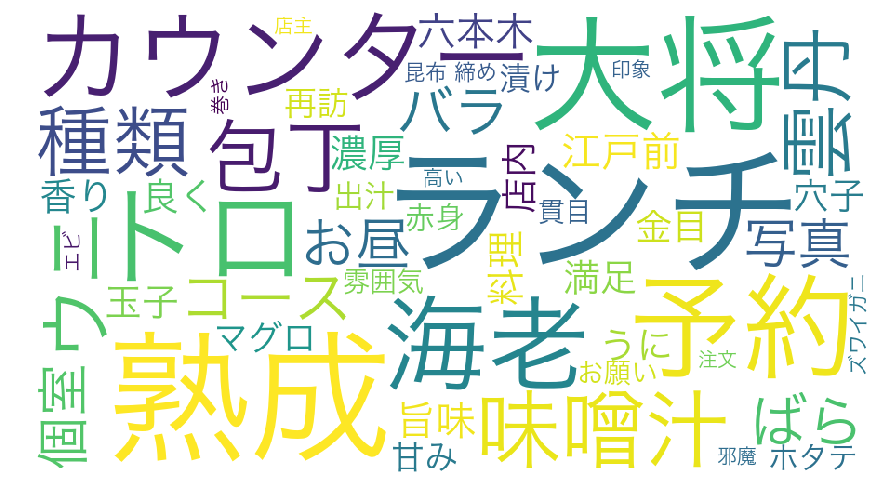

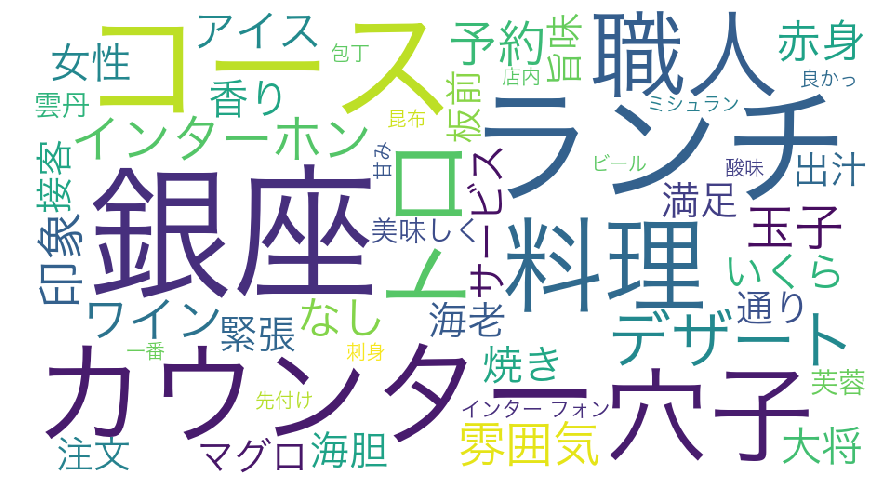

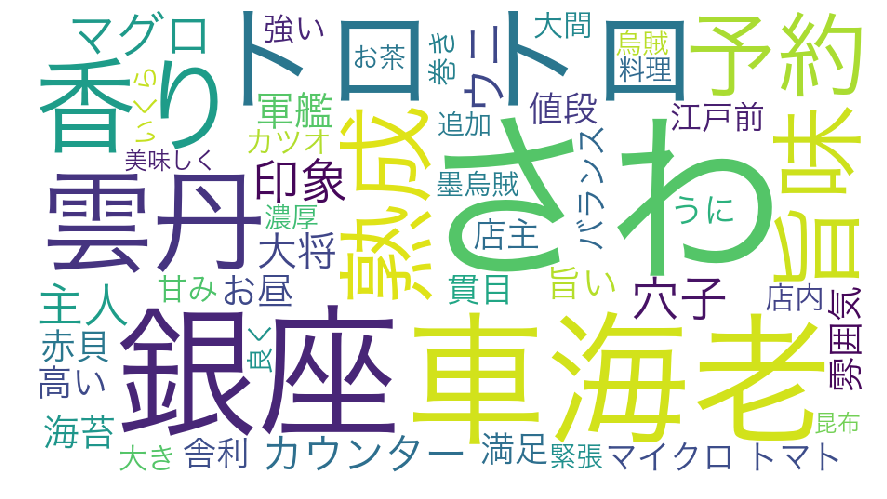

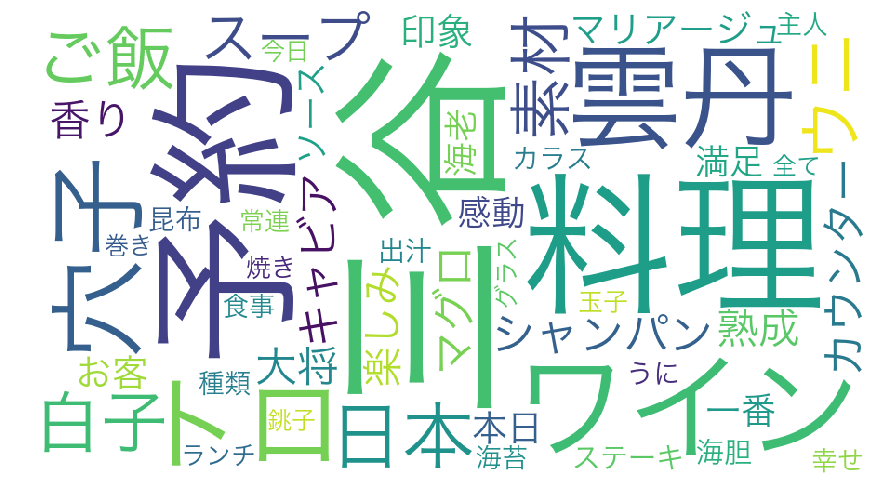

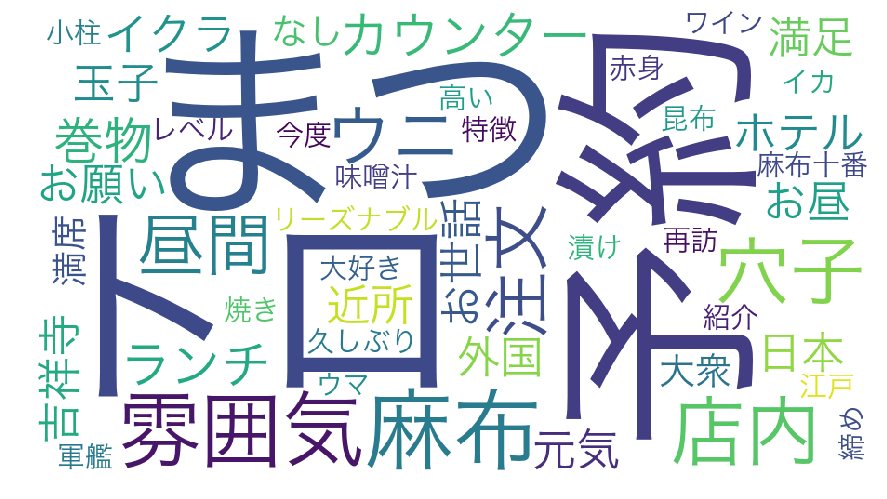

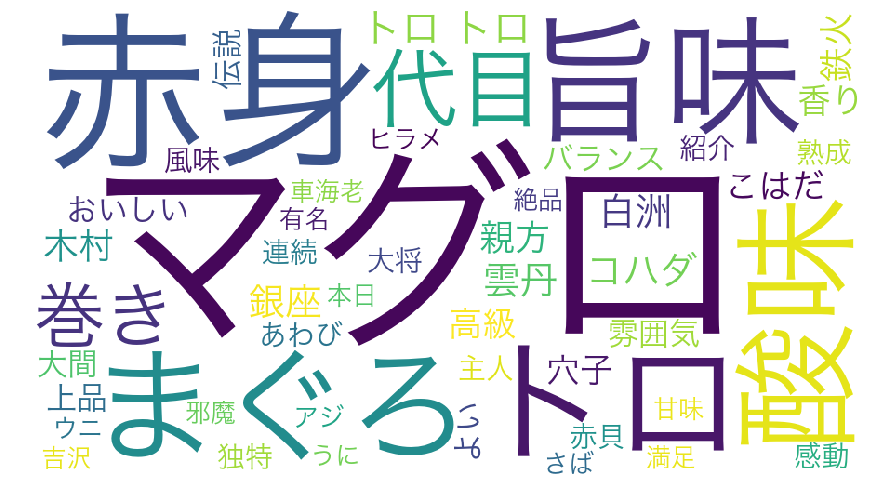

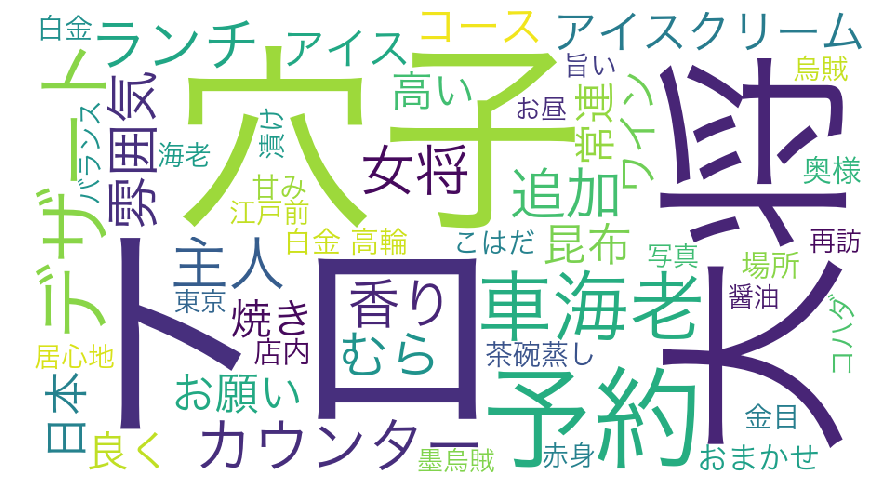

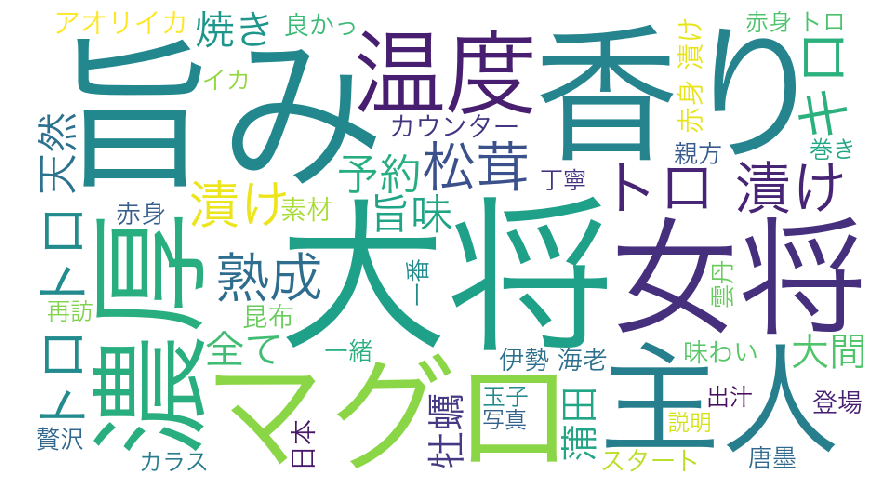

In [55]:
for i in range(len(lunch_file)):
    file_name = store_name[i]+"lunch"
    create_wordcloud(" ".join(lunch(lunch_file[i])),file_name)

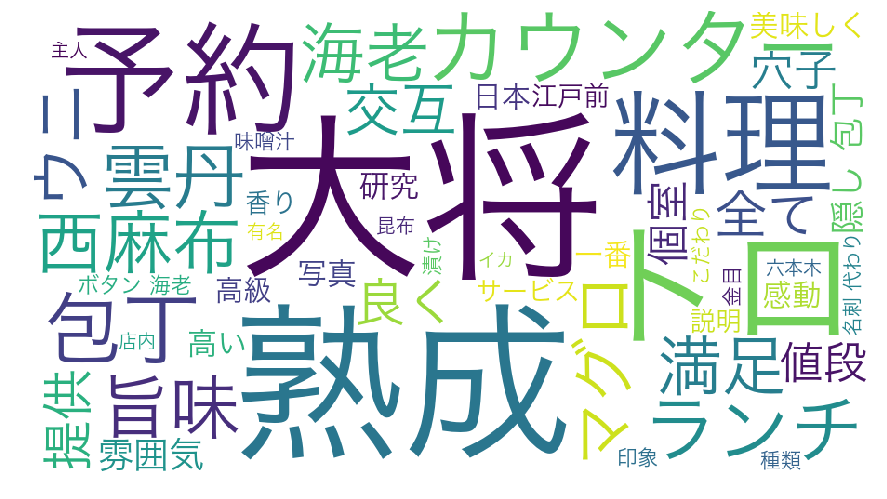

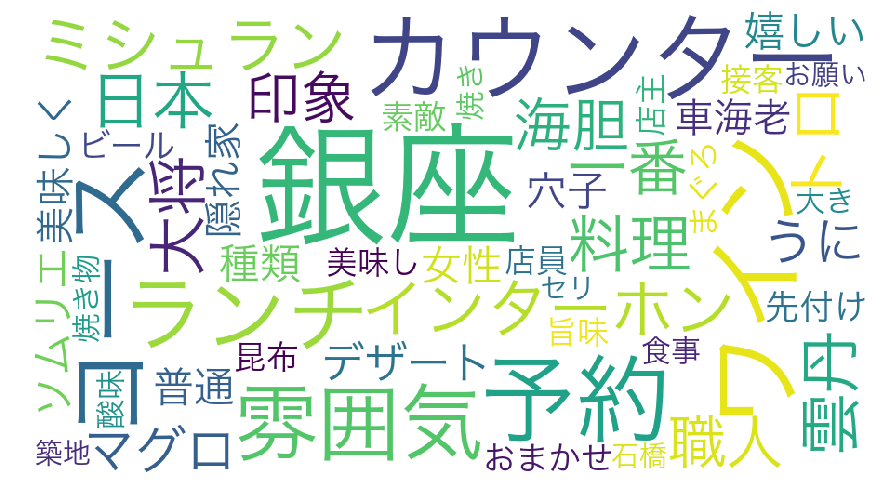

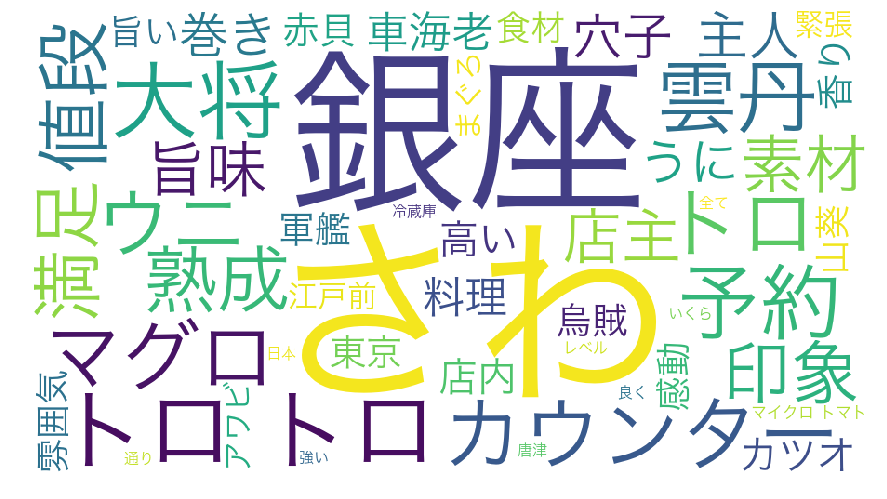

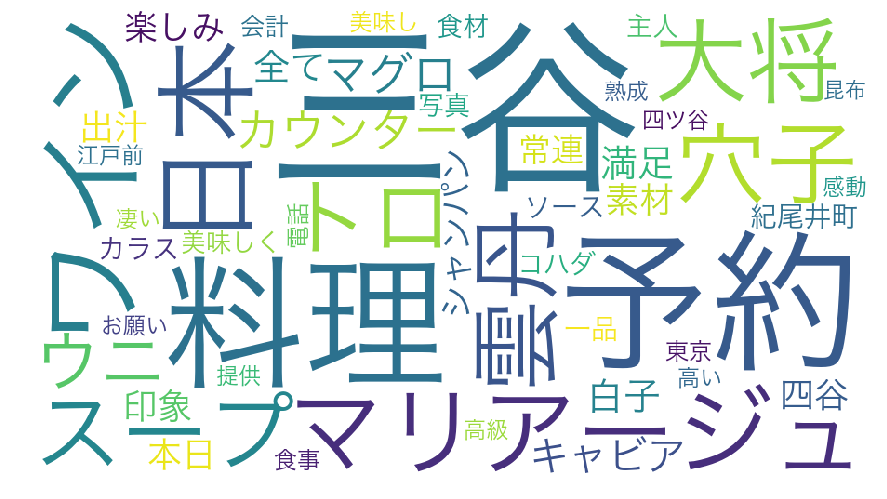

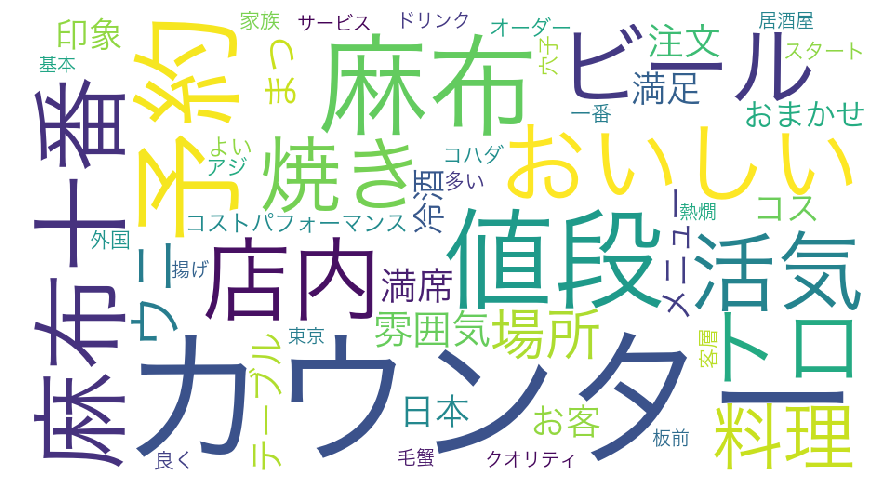

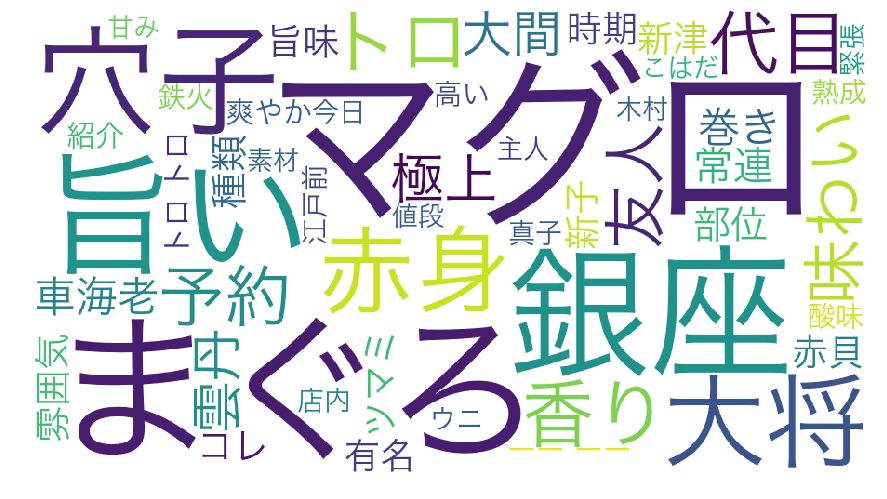

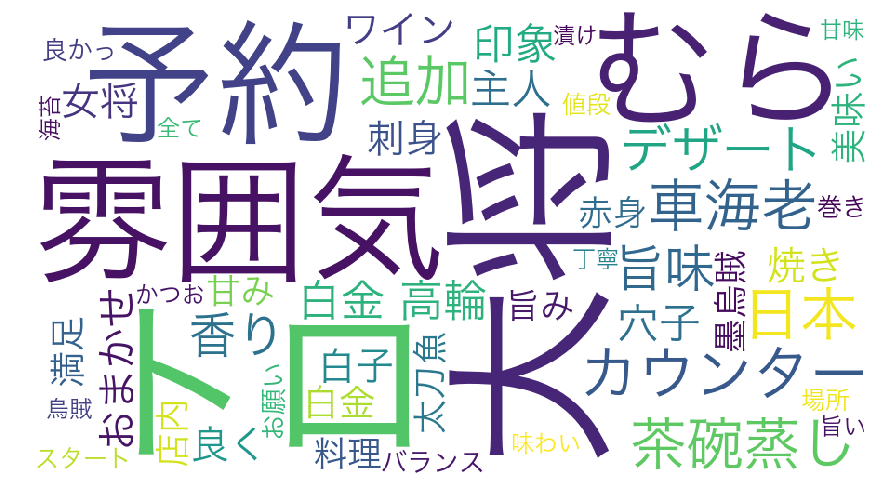

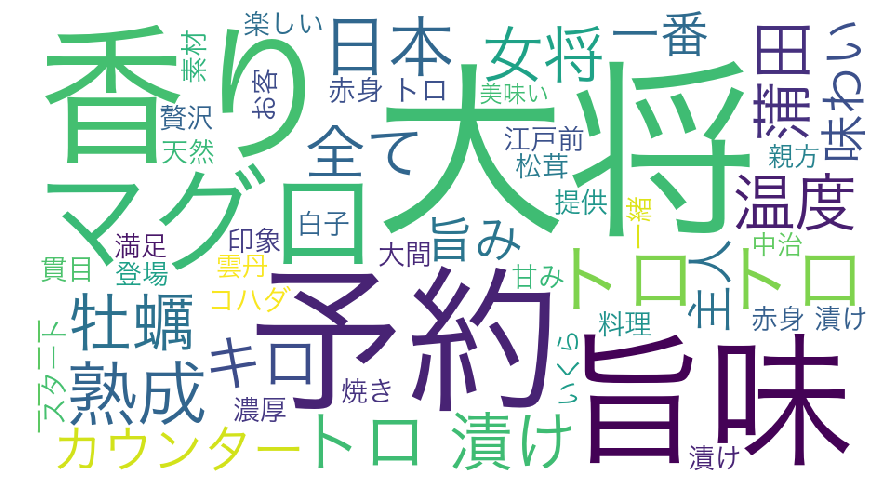

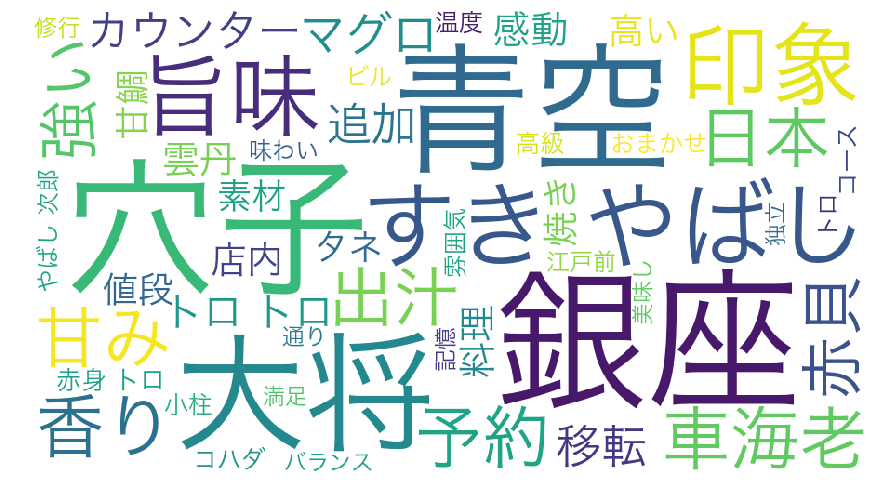

In [56]:
for i in range(len(dinner_file)):
    file_name = store_name[i]+"dinner"
    create_wordcloud(" ".join(dinner(dinner_file[i])),file_name)